# 01 Instalación de librerías y dependencias

In [1]:
# Librerias necesarias en colab

!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 5.0 MB/s 
     |████████████████████████████████| 25.9 MB 3.9 MB/s 
     |████████████████████████████████| 56 kB 2.9 MB/s 
     |████████████████████████████████| 1.3 MB 12.4 MB/s 
     |████████████████████████████████| 88 kB 3.1 MB/s 
     |████████████████████████████████| 2.0 MB 31.6 MB/s 
     |████████████████████████████████| 167 kB 49.3 MB/s 
     |████████████████████████████████| 1.7 MB 44.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 17.9 MB 1.3 MB/s 
     |████████████████████████████████| 10.4 MB 25.8 MB/s 
     |████████████████████████████████| 6.8 MB 6.1 MB/s 
     |████████████████████████████████| 262 kB 58.3 MB/s 
     |████████████████████████████████| 1

In [2]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.3 which is incompatible.


In [3]:
!pip install jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
pandas-profiling 3.2.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.3 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# 02 Importación del archivo al entorno Colab y conversión a Dataframe (filas y columnas)

In [2]:
# Debemos importar el archivo al entorno de python

from google.colab import files
uploaded = files.upload()

Saving S04DS01 BigFive.csv to S04DS01 BigFive.csv


In [3]:
# Debemos convertir el archivo a un dataframe (estructura de filas y columnas)
dataframe = pd.read_csv('S04DS01 BigFive.csv', encoding = "ISO-8859-1")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


In [4]:
dataframe

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


# 02 Análisis del Dataframe

In [5]:
'''
usuario (el nombre en Twitter)
“op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte - Apertura al Cambio
“co” = Conscientiousness – grado de orden, prolijidad, organización - Grado de Perfeccionista
“ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social - Grado de Extroversión
“ag” = Agreeableness – grado de empatía con los demás, temperamento - Grado de Empatía
“ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo - Grado de Seguridad
Wordcount – Cantidad promedio de palabras usadas en sus tweets
Categoria – Las categorias son: 1-actores 2-cantantes 3-modelo 4-TV 5-radio 6-tecnología 7-deportes 8-politica 9-escritor
'''
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [6]:
'''
Las categorias son: 1-actores 2-cantantes 3-modelo 4-TV 5-radio 6-tecnología 7-deportes 8-politica 9-escritor
'''
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


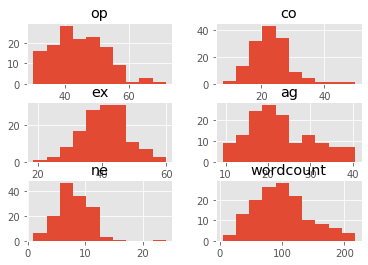

In [7]:
dataframe.drop(['categoria'],1).hist()
plt.show()

In [ ]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

In [8]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

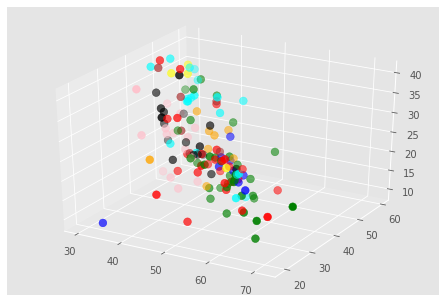

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

# 03 Realización de modelamiento de Clustering con PyCaret

In [10]:
dataframe

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [11]:
dataframe.columns

Index(['usuario', 'op', 'co', 'ex', 'ag', 'ne', 'wordcount', 'categoria'], dtype='object')

# 04 Configuramos el Dataframe para la realización del modelamiento

In [12]:
from pycaret.clustering import *

setup = setup(data = dataframe,
            numeric_features= ['op', 'co', 'ex', 'ag', 'ne', 'wordcount'],
            categorical_features= ['categoria'],
            ignore_features= ["usuario"],
            log_experiment = True,
            log_plots = True,
            normalize = True,
            #profile=False, #Con True me hace un EDA
            experiment_name = 'Experimento 1',
            session_id = 1,
            silent=True,
            verbose=False
            )

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# 05 Modelamos con Kmeans

In [13]:
#Creamos un modelo de clustering con N clusters segun lo visto en el metodo de elbow
kmeans = create_model("kmeans",algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       num_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=1, tol=0.0001, verbose=True)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2109,43.0817,1.7157,0,0,0


In [14]:
#Hacemos print de los parametros del modelo
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=1, tol=0.0001, verbose=0)


# 06 Testeamos el óptimo de k Cluster

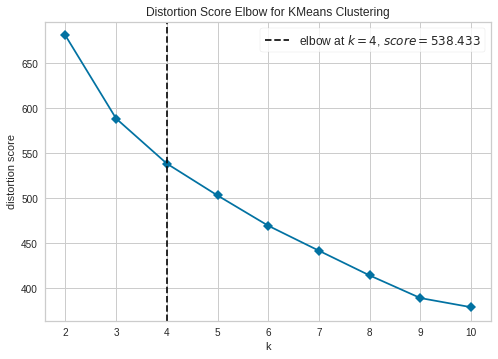

In [15]:
#Revisamos elbow score para ver cuantos clusters necesitamos
plot_model(kmeans, plot="elbow")

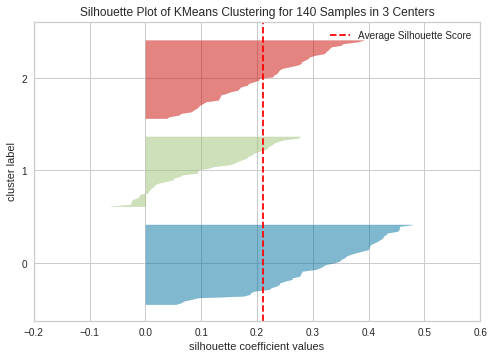

In [16]:
#Analizamos el grafico de silhouette por cluster label
plot_model(kmeans, plot="silhouette")

In [17]:
plot_model(kmeans, plot="tsne")

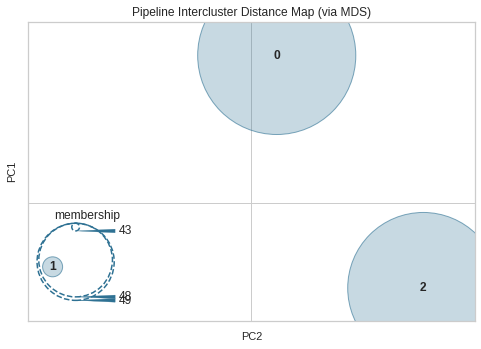

In [18]:
plot_model(kmeans, plot="distance")

In [19]:
#Vemos cuantos hay por cada segmento
plot_model(kmeans, plot="distribution")

In [20]:
plot_model(kmeans, plot = 'distribution', feature = 'op')

In [21]:
plot_model(kmeans, plot = 'distribution', feature = 'co')

In [22]:
plot_model(kmeans, plot = 'distribution', feature = 'ex')

In [23]:
plot_model(kmeans, plot = 'distribution', feature = 'ag')

In [24]:
plot_model(kmeans, plot = 'distribution', feature = 'ne')

In [25]:
plot_model(kmeans, plot = 'distribution', feature = 'wordcount')

# 07 Realizamos la predicción de los k Cluster y su exportación para el posterior análisis de los arquetipos

In [26]:
predictions = predict_model(kmeans, data = dataframe)
predictions.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria,Cluster
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7,Cluster 0
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,Cluster 1
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4,Cluster 0
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2,Cluster 0
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4,Cluster 0


In [27]:
#Count usuario per categoria
print(predictions.groupby('Cluster').size())

Cluster
Cluster 0    49
Cluster 1    43
Cluster 2    48
dtype: int64


In [28]:
#exportar el archivo a "colab"
predictions.to_csv(r'S04A02_clustering_BigFive.csv')